<a href="https://colab.research.google.com/github/HwayoungYoon/Data-Analysis-Practice/blob/master/kaggle-survey-2017/kaggle_DS_FAQ_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[부스트코스] 캐글 실습으로 배우는 데이터 사이언스**
## Ⅲ. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?
https://www.edwith.org/boostcourse-ds-kaggle/lecture/57566/

---

학습기간 : 2020년 07월 18일 ~ 2020년 07월 19일

---

* 출처 : 박조은 강사님 [Github](https://github.com/corazzon/KaggleStruggle/blob/master/kaggle-survey-2017/Kaggle-ML-DS-survey-2017-EDA-FAQ.ipynb) 

참고 URL :

* [Data Science FAQ | Kaggle](https://www.kaggle.com/rounakbanik/data-science-faq)

* [Novice to Grandmaster | Kaggle](https://www.kaggle.com/ash316/novice-to-grandmaster)

* 이 설문조사의 결과를 바탕으로 데이터사이언스와 머신러닝과 관련 된 인사이트를 얻어볼 수 있지 않을까 가설을 세워본다.

---

## **자주 묻는 질문 FAQ**
초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

# **데이터 파일**

**캐글러를 대상으로 한 설문조사**
* 설문기간 : 2017년 8월 7일부터 8월 25일까지
* 평균 응답 시간은 16.4 분
* 171 개 국가 및 지역에서 16,716 명의 응답자
* 특정 국가 또는 지역에서 응답자가 50 명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화
* 설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
* 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
* 급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함
* 미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공
* 질문은 선택적
* 모든 질문이 모든 응답자에게 보여지는 것은 아님 
* 취업을 한 사람과 학생을 나누어 다른 질문을 함
* 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
* 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
* 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정


**데이터 파일**

5 개의 데이터 파일을 제공

* schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
* multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
* freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
* conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)
* RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

In [1]:
# Google Drive와 Colab 연동
# 실행 후 나오는 URL 접속하여 authorization code 받기
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd gdrive/My Drive/kaggle-survey/data

/content/gdrive/My Drive/kaggle-survey/data


In [3]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# 설문 스키마를 가져온 후 행, 열의 갯수 확인
question = pd.read_csv('schema.csv')
question.shape

(290, 3)

In [5]:
# 선다형 객관식 문제에 대한 응답을 가져온 후 행, 열의 갯수 확인
mcq = pd.read_csv('multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

# **Q6. 블로그, 팟캐스트, 수업, 기타 등등 추천할만한 것이 있는지?**

In [6]:
# 추천할만한 플랫폼에 대한 데이터 확인
## 'BlogsPodcastsNewslettersSelect' column을 가져온 뒤 ','로 split한 뒤 다시 담아줌
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'
].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [7]:
# 추천할만한 플랫폼에 대한 데이터 확인
## 한 행에 여러 가지 항목이 있어서 하나의 항목을 하나의 행으로 분리
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [8]:
# 상위 20개의 데이터 확인
s = s[s != 'nan'].value_counts().head(20)

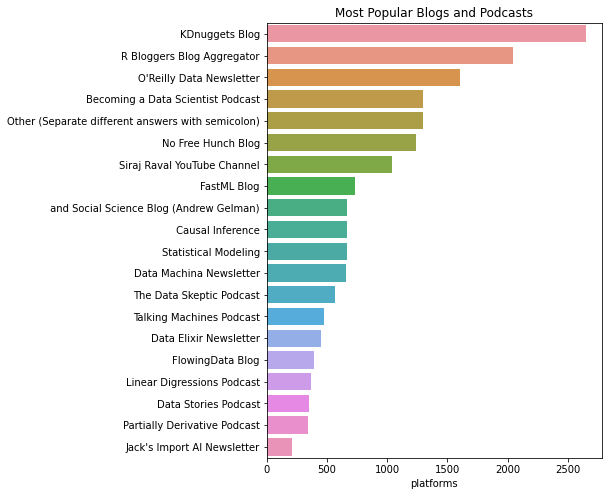

In [9]:
# 추천할만한 플랫폼에 대한 시각화
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

* 응답자들은 [KDNuggets Blog](https://www.kdnuggets.com/), R Bloggers Blog Aggregator 그리고 O'Reilly Data Newsletter가 가장 유용하다고 응답했다. [Becoming a Data Scientist Podcast](https://www.youtube.com/channel/UCfxnrdBM1YRV9j2MB8aiy4Q), No Free Hunch Blog, [Siraj Raval YouTube Channel](https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A) 등의 플랫폼도 유명한 듯 하다.



In [10]:
# 인기있는 코스 플랫폼에 대한 데이터 확인
mcq['CoursePlatformSelect'] = mcq[
    'CoursePlatformSelect'].astype(
    'str').apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [11]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

In [12]:
t = t[t != 'nan'].value_counts()

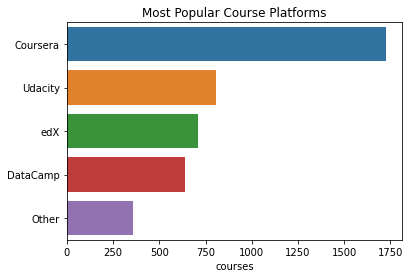

In [13]:
# 인기있는 코스 플랫폼에 대한 시각화
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)

* Coursera(Andrew Ng의 Machine Learning 강의의 영향으로 추정됨)와 Udacity가 가장 인기있는 플랫폼이라고 응답했다.

# **Q7. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?**

In [14]:
# 데이터 사이언스에서 가장 중요한 스킬에 대한 데이터 확인
## 'JobSkillImportance'의 column들을 하나의 feature로 모아서 줌
job_features = [
    x for x in mcq.columns if x.find(
        'JobSkillImportance') != -1 
    and x.find('JobSkillImportanceOther') == -1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [15]:
# 데이터 사이언스에서 가장 중요한 스킬에 대한 데이터 확인
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'KaggleRanking': Nice to have    0.677261
 Unnecessary     0.203876
 Necessary       0.118863
 Name: JobSkillImportanceKaggleRanking, dtype: float64,
 'MOOC': Nice to have    0.606994
 Unnecessary     0.285752
 Necessary       0.107255
 Name: JobSkillImportanceMOOC, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have 

In [16]:
# 데이터 사이언스에서 가장 중요한 스킬에 대한 데이터 확인
## 'Nice to have', 'Necessary', 'Unnecessary' 세가지 항목에 대한 응답 확인
## heatmap을 그리기 위해 'Nice to have', 'Necessary', 'Unnecessary' 항목이 column이 될 수 있도록 transpose() 진행
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


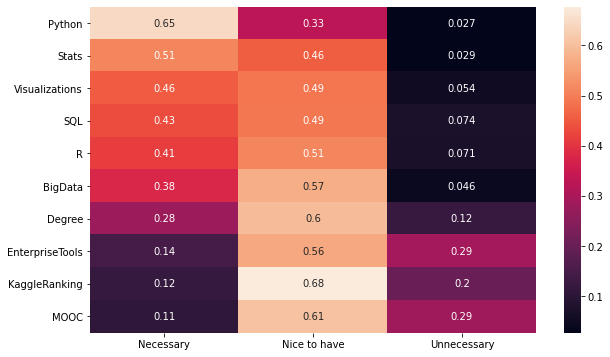

In [17]:
# 어떤 스킬이 중요한지에 대한 상관관계 시각화
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary", 
                            ascending=False), annot=True)

* 1에 가까울수록 상관관계가 높다.
* 응답자들은 Python이 0.65로 가장 유용하다고 응답했고, 다음으로 통계학(Stats), 시각화(Visualizations), SQL, R, BigData 등이 있다.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

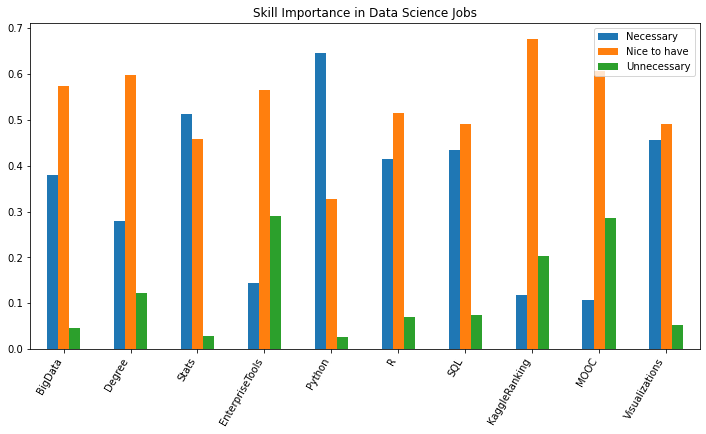

In [18]:
# 중요함의 정도를 각 스킬별로 그룹화한 것에 대한 시각화
jdf.plot(kind='bar', figsize=(12,6), 
         title="Skill Importance in Data Science Jobs")
plt.xticks(rotation=60, ha='right')

* 꼭 필요한 것으로는 Python, 통계학(Stats), 시각화(Visualizations), SQL, R이 있다.
* 있으면 좋은 것은 캐글 랭킹(KaggleRanking), MOOC, 학위(Degree), BigData, 툴 사용법(EnterpriseTools)이 있다.

# **Q8. 데이터 과학자의 평균 급여는 얼마나 될까?**

In [19]:
# 평균 급여에 대한 전체 응답수
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [20]:
# 평균 급여에 대한 데이터
## ,나 -가 포함되면 숫자 변환시 오류가 생기므로 str.replace를 이용하여 제거
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace('-','')

In [21]:
# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)
## salary 데이터프레임 생성
salary = mcq[
    ['CompensationAmount','CompensationCurrency',
     'GenderSelect',
     'Country',
     'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates,left_on='CompensationCurrency',
                      right_on='originCountry', how='left')
## salary 데이터 프레임에 USD 기준으로 계산된 'Salary' column 추가
salary['Salary'] = pd.to_numeric(
    salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [22]:
# 급여의 최댓값, 최솟값, 평균 확인
print('Maximum Salary is USD $',
      salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
      salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
      salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


* 급여의 최댓값은 여러 국가들의 GDP보다 크다고 한다. 이는 가짜 응답이며, 평균급여는 USD $53,812이다.
* 그래프를 좀 더 잘 표현하기 위해 50만불 이하의 데이터만 distplot으로 그려보자.

Text(0.5, 1.0, 'Salary Distribution')

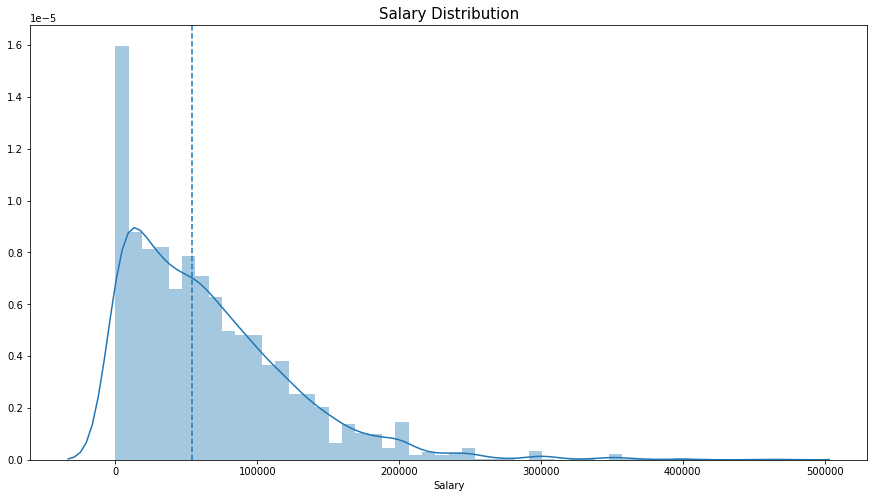

In [23]:
# 평균 급여에 대한 시각화
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution',size=15)

**▼ Study Point!**

```
plt.axvline(salary['Salary'].median())
```
'Salary' column의 중간값(또는 원하는 값)에 해당하는 선을 그어줌

* 급여가 0인 데이터가 많다고 응답했으며 중간값은 USD $53000 정도라고 응답했다.

Text(0.5, 1.0, 'Highest Salary Paying Countries')

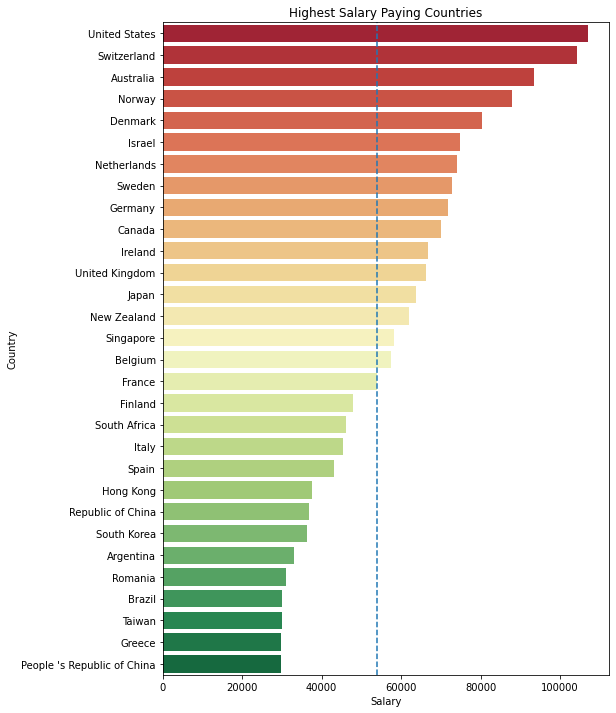

In [24]:
# 국가별 평균 급여에 대한 시각화
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby(
    'Country')['Salary'].median().sort_values(
    ascending=False)[:30].to_frame()

sns.barplot('Salary', 
            sal_coun.index,
            data = sal_coun,
            palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

* 미국(United States), 스위스(Switzerland), 호주(Australia), 노르웨이(Norway), 덴마크(Denmark), 이스라엘(Israel), 네덜란드(Netherlands) 순으로 급여가 많다고 응답했다.
* 대한민국(South Korea)는 24위임을 볼 수 있다.

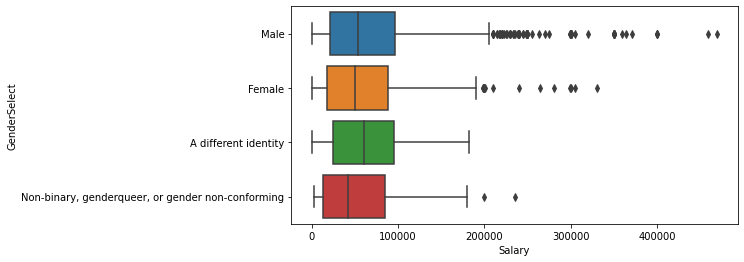

In [25]:
# 성별간 평균 급여의 차이에 대한 시각화
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary', data=salary)

* box plot 결과로 볼 때 성별간 평균 급여에 큰 차이는 보이지 않는다. 그러나 상위 급여는 주로 남성이 받고 있다고 보여진다.

In [26]:
# 대한민국의 성별간 평균 급여에 대한 데이터 확인
salary_korea = salary.loc[(salary['Country']=='South Korea')]
salary_korea.shape

(26, 8)

* 대한민국에는 총 26명의 응답자가 존재한다.

In [27]:
# 대한민국 여성의 평균 급여에 대한 데이터 확인
salary_korea[salary_korea['GenderSelect'] == 'Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


* 대한민국 여성 응답자는 3명에 불과하므로 일반화에는 어려움이 있다.

In [28]:
# 대한민국 남성의 평균 급여에 대한 데이터 확인
salary_korea_male = salary_korea[
    salary_korea['GenderSelect']== 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

* 대한민국 남성 응답자는 총 23명이므로 이 또한 일반화에는 어려움이 있다. 평균 급여는 USD $43540이다.

In [29]:
# 대한민국 남성의 평균 급여에 대한 데이터 확인
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


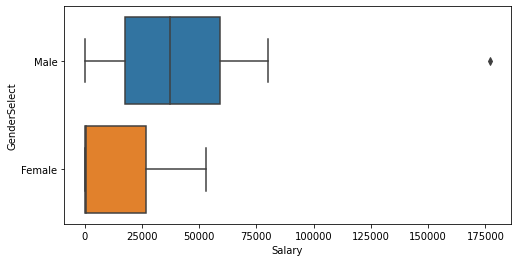

In [30]:
# 대한민국의 성별간 평균 급여의 차이에 대한 시각화
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea)

# **Q9. 개인프로젝트나 학습용 데이터를 어디에서 얻나요?**

In [31]:
# 데이터셋을 얻는 플랫폼에 대한 데이터 확인
mcq['PublicDatasetsSelect'] = mcq[
    'PublicDatasetsSelect'].astype('str').apply(
    lambda x: x.split(',')
    )

In [32]:
q = mcq.apply(
    lambda x: pd.Series(x['PublicDatasetsSelect']),
    axis=1).stack().reset_index(level=1, drop=True)

q.name = 'courses'

In [33]:
q = q[q != 'nan'].value_counts()
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


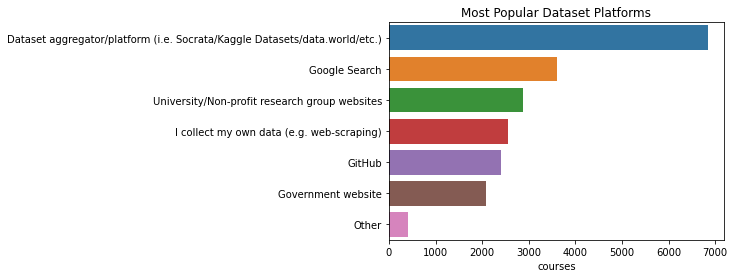

In [34]:
# 데이터셋을 얻는 플랫폼에 대한 시각화
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

* Kaggle이나 Socrata 등의 플랫폼(Dataset aggregator/platform (i.e. Socrata / Kaggle Datasets / data.world / etc.))은 개인 프로젝트나 학습에 사용하기 위한 데이터를 얻는데 가장 인기있다. Google 검색(Google Search) 및 대학/비영리 단체 웹 사이트(University/Non-profit research group websites)는 각각 2위와 3위에 있다. 직접 웹스크래핑 등을 통해 데이터를 수집하는 경우(I collect my own data (e.g. web-scraping))도 상당수 있었다.


# **Q10. 개인프로젝트에서 공개된 데이터셋을 다루는 데 가장 어려운 점은 무엇일까?**

In [35]:
# 주관식 응답에 대한 총 응답수
ff = pd.read_csv('freeformResponses.csv', 
                 encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

* 주관식 응답은 총 16716명이 응답했다.

In [36]:
# 설문내용과 응답대상 확인
qc = question.loc[question[
    'Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [37]:
# 개인프로젝트에서 공개된 데이터셋을 다루는 데 가장 어려운 점에 대한 데이터
## 상위 15개 데이터 확인
ppcff = ff[
    'PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning,20
Cleaning the data,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
Size,9
-,9


* 개인프로젝트에서 공개된 데이터셋을 다루는 데 가장 어려운 점에 대해 대부분 데이터를 정제하는 일(Cleaning data)이라고 응답하였고 그 다음이 데이터 크기(Size), 결측값(Missing data)라고 응답했다.

In [38]:
# 개인프로젝트에서 공개된 데이터셋을 다루는 데 가장 어려운 점에 대한 시각화(워드클라우드)
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
## %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline
%config InlineBackend.figure_format='retina'

def displayWordCloud(data = None, backgroundcolor = 'white', width=1200, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [39]:
ppc = ff['PersonalProjectsChallengeFreeForm'].dropna()

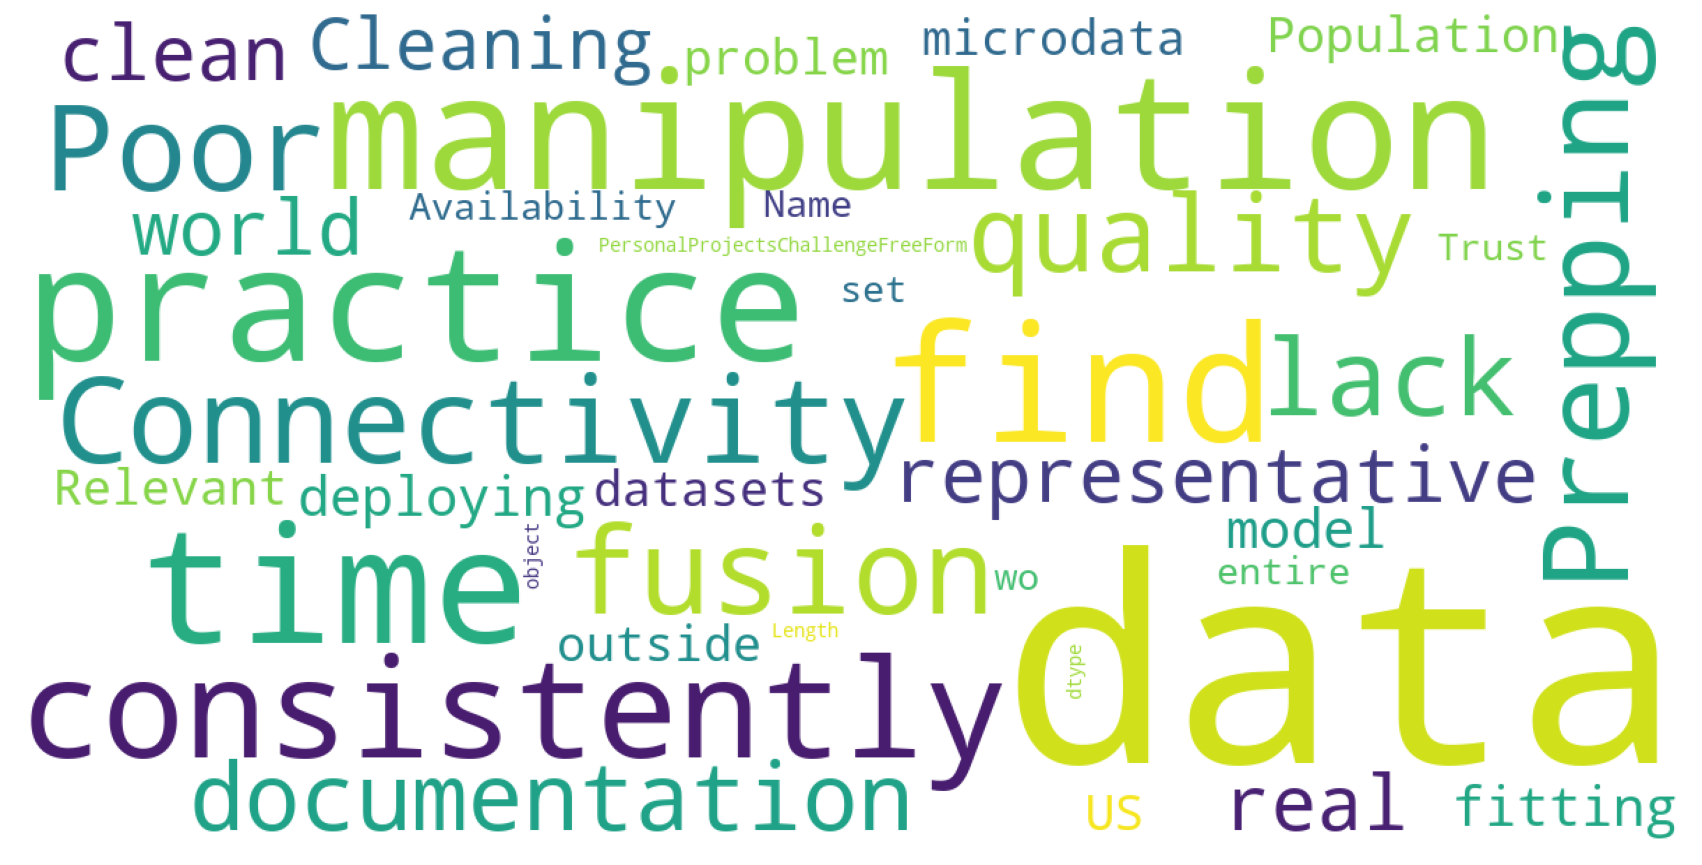

CPU times: user 1.33 s, sys: 20.7 ms, total: 1.35 s
Wall time: 1.36 s


In [40]:
%time displayWordCloud(''.join(str(ppc)))

# **Q11. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?**

In [41]:
# 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일에 대한 데이터 확인
time_features = [
    x for x in mcq.columns if x.find('Time') != -1][4:10]

In [42]:
# 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일에 대한 데이터 확인
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf = pd.Series(tdf)
print(tdf)

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64


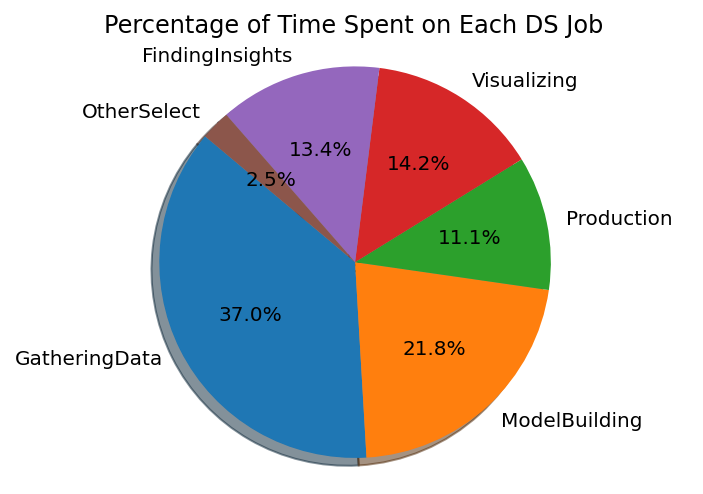

In [43]:
# 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일에 대한 시각화
plt.pie(tdf, labels=tdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

* 데이터를 수집하는 일(GatheringData)이 37%로 업무의 가장 큰 비중을 차지한다. 그 다음으로 모델을 구축하는 것(ModelBuilding), 시각화(Visualizing), 인사이트를 찾는 것(FindingInsights)이 가장 많은 시간을 필요로 한다고 응답했다.